<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:** Кулик Екатерина Геннадьевна

**Забавный факт о себе:** никогда не ношу шапку

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 13.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [5]:
import gdown

url = "https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1P1wKk9L_qygClAAPoEs5BCUUQZnSrgWK

but Gdown can't. Please check connections and permissions.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/My Drive/data"

'Copy of ria_news.tsv'	'Copy of vk_comments.tsv'  'Copy of vk_news.tsv'


В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [8]:
df_ria = pd.read_csv('/content/drive/My Drive/data/Copy of ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


href        date                    time  \
0  /20181231/1548961410.html  2018-12-31  31 декабря 2018, 23:52   
1  /20181231/1548961364.html  2018-12-31  31 декабря 2018, 23:19   
2  /20181231/1548961337.html  2018-12-31  31 декабря 2018, 23:12   
3  /20181231/1548961304.html  2018-12-31  31 декабря 2018, 23:09   
4  /20181231/1548961265.html  2018-12-31  31 декабря 2018, 23:07   

                                               title  \
0  Нетаньяху не собирается в отставку в случае пр...   
1  Макрон в новогоднем обращении затронул тему ре...   
2  Аарон Рэмзи проведет переговоры с пятью топ-кл...   
3  Гол Азмуна принес сборной Ирана победу над кат...   
4  Пятая ракетка мира дель Потро пропустит Открыт...   

                                             snippet  \
0  Премьер-министр Израиля Биньямин Нетаньяху не ...   
1  Результат реформ не может быть мгновенным, зая...   
2  Полузащитник лондонского "Арсенала" Аарон Рэмз...   
3  Футболисты сборной Ирана одержали победу над к...   
4  Аргентинский теннисист Хуан Мартин дель Потро ...   

                                                text category  \
0  МОСКВА, 31 дек - РИА Новости. Премьер-министр ...   В мире   
1  ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...   В мире   
2  МОСКВА, 31 дек - РИА Новости. Полузащитник лон...      NaN   
3  МОСКВА, 31 дек - РИА Новости. Футболисты сборн...      NaN   
4  МОСКВА, 31 дек - РИА Новости. Аргентинский тен...      NaN   

                                     tags   shows  
0     Биньямин Нетаньяху, Израиль, В мире   728.0  
1       Эммануэль Макрон, Франция, В мире  3086.0  
2                     ФК Арсенал (Лондон)   183.0  
3  Сердар Азмун, Сборная Ирана по футболу    78.0  
4                                  Теннис    79.0

Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [9]:
df_vk = pd.read_csv('/content/drive/My Drive/data/Copy of vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


id                       href             datetime  \
0  24006362  /20190201/1550280358.html  2019-02-01 23:13:17   
1  24006240  /20190201/1550268781.html  2019-02-01 22:38:41   
2  24006100  /20190201/1550282212.html  2019-02-01 21:58:52   
3  24005972  /20190202/1550283179.html  2019-02-01 21:27:06   
4  24005764  /20190201/1550262848.html  2019-02-01 20:55:54   

                                               title  likes  comments snippet  
0  В ДНР заявили о задержании диверсантов, причас...     15        28     NaN  
1  Житель Урала "заминировал" ТЦ из-за снятия  со...     32        42     NaN  
2      В Черном море нашли "потерянный флот Гитлера"     84        23     NaN  
3  В США освободили задержанную российскую актрис...     58        35     NaN  
4  Толкнувший Скабееву депутат Рады заявил о гроз...     45       145     NaN

В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [10]:
df_comments = pd.read_csv('/content/drive/My Drive/data/Copy of vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

(2612629, 5)


id     post_id             datetime  \
0  24006366.0  24006362.0  2019-02-01 23:14:14   
1  24006370.0  24006362.0  2019-02-01 23:15:23   
2  24006371.0  24006362.0  2019-02-01 23:16:21   
3  24006374.0  24006362.0  2019-02-01 23:16:38   
4  24006375.0  24006362.0  2019-02-01 23:16:40   

                                                text  likes  
0                                       ЧВК Вагнера?    5.0  
1                [id4710641|Евгений], выздоравливай.    3.0  
2  [id442655034|Андрей], искренне желаю этого все...    4.0  
3                         Опять про Украину новости?    1.0  
4                                      Че такое ДНР?    2.0

# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [11]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [12]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [13]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [14]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [15]:
df_ria.target_tags.values[:3]

array([list([1137, 48, 497]), list([637, 260, 497]), list([286])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [18]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [19]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [20]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [21]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [22]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [23]:
df_vk['title_clean'] = df_vk.title.apply(normalise_text)

df_ria['snippet_clean'] = df_ria.snippet.fillna("#UNKN").apply(normalise_text)
df_vk['snippet_clean'] = df_vk.snippet.fillna("#UNKN").apply(normalise_text)

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [24]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [25]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [26]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [27]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df_test = df[df['date'] >= '2018-12-01']
df_val = df[(df['date'] >= '2018-10-01') & (df['date'] < '2018-12-01')]
df_train = df[df['date'] < '2018-10-01']

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [28]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

href  \
0  /20181231/1548960744.html   
1  /20181231/1548958617.html   
2  /20181231/1548957394.html   
3  /20181231/1548954909.html   
4  /20181231/1548957120.html   

                                         title_clean  \
0   митрополит рязанский раскритиковал иронию судьбы   
1  на украине позавидовали стене на границе с крымом   
2  в госдуме предложили отказаться от газа в жилы...   
3                названы лучшие средства от похмелья   
4  новогоднее поздравление порошенко разозлило по...   

                    target_tags  
0                         [869]  
1                    [989, 497]  
2  [641, 641, 1220, 1224, 1278]  
3                         [869]  
4                    [989, 497]

Напишем датасет для поставки данных в нейросеть.


In [49]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        return (self.X_title[idx, :], self.y[idx])


__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [50]:
class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)
       self.snippet = snippet
       if snippet is not None:
        self.X_snippet = self.create_text(snippet, max_snippet_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.snippet is None:
          return self.X_title[idx, :], self.y[idx]
        else:
          return self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx]

Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [51]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset_without_snippet = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset_without_snippet = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
test_dataset_without_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [52]:
train_dataloader_without_snippet = DataLoader(train_dataset_without_snippet, shuffle=True, batch_size=64, num_workers=4)
val_dataloader_without_snippet = DataLoader(val_dataset_without_snippet, shuffle=False, batch_size=4096, num_workers=4)

## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [53]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [54]:
!pip3 install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 48.2 MB/s eta 0:00:00


In [55]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

Обучим модель.

In [ ]:
from pytorch_lightning.loggers import WandbLogger
import wandb
import random
import math
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

wandb_logger = WandbLogger(project="hw_04_texts", name="baseline")
model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="baseline_model",
    save_top_k=1,
    monitor="val_loss",
    mode="min",
    save_weights_only=False
)

train_module =TrainLightningModule(model_baseline, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger, callbacks=[checkpoint_callback])
wandb_logger.log_hyperparams({
    "EMBEDDING_DIM": EMBEDDING_DIM,
    "EPOCHS": EPOCHS,
    "LR": LR,
    "VOCAB_SIZE": VOCAB_SIZE,
    "CLASSES_NUM": CLASSES_NUM
})
trainer.fit(train_module, train_dataloader_without_snippet, val_dataloader_without_snippet)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: katkulikat (katkulikat-hse-university). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleClassifier | 3.5 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.906    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [ ]:
class TitleSnippetModel(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim*2, output_dim)

    def forward(self, title, snippet):
        title_embedded = self.embedding(title)
        snippet_embedded = self.embedding(snippet)

        title_avg = title_embedded.mean(dim=1)
        snippet_avg = snippet_embedded.mean(dim=1)

        concatenated = torch.cat([title_avg, snippet_avg], dim=1)

        return self.fc(concatenated)

In [ ]:
class TitleSnippetLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title, snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [ ]:
class NewsDataset(Dataset):

    def __init__(self, target, title, snippet, vocab, vocab_size, max_title_len, max_classes, max_snippet_len):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)
       self.X_snippet = self.create_text(snippet, max_snippet_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
      result = []
      for sent in texts:
        sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]


        if len(sent_tokenize) > max_len:
            sent_tokenize = sent_tokenize[:max_len]
        else:
            sent_tokenize += [0] * (max_len - len(sent_tokenize))

        result.append(sent_tokenize)
      return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPET_LEN = 1000

vocabulary = create_vocab(' '.join(df_ria.title_clean.values) + ' ' + ' '.join(df_ria.snippet_clean.values))

train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, df_train.snippet_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,MAX_SNIPPET_LEN)
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, df_val.snippet_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, MAX_SNIPPET_LEN )
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, df_test.snippet_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM,MAX_SNIPPET_LEN )

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

wandb_logger = WandbLogger(project="hw_04_texts", name="titlesnippet")
model_both = TitleSnippetModel(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_with_snippet =TitleSnippetLightningModule(model_both, LR, criterion)
checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="titlesnippet_model",
    save_top_k=1,
    monitor="val_loss",
    mode="min",
    save_weights_only=False
)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger, callbacks=[checkpoint_callback] )
wandb_logger.log_hyperparams({
    "EMBEDDING_DIM": EMBEDDING_DIM,
    "EPOCHS": EPOCHS,
    "LR": LR,
    "VOCAB_SIZE": VOCAB_SIZE,
    "CLASSES_NUM": CLASSES_NUM
})
trainer.fit(train_module_with_snippet, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | TitleSnippetModel | 4.0 M  | train
1 | criterion | CrossEntropyLoss  | 0      | train
--------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Ссылка на дашборд: https://wandb.ai/katkulikat-hse-university/hw_04_texts?nw=nwuserkatkulikat

Модель, которая использует как заголовки, так и сниппеты, не показала улучшения на валидации по сравнению с моделью, которая работает только с заголовками. Это может быть связано с тем, что добавление сниппетов не принесло дополнительной полезной информации для задачи классификации. Но в тоже время вполне возможно, что слишком большие длины сниппетов усложнили модель, и она не смогла извлечь нужные паттерны.

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [ ]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=4096, num_workers=4)
test_dataloader_without_snippet = DataLoader(test_dataset_without_snippet, shuffle=False, batch_size=4096, num_workers=4)

In [ ]:
all_pred_probs = []
with torch.no_grad():
  for title, snippet, target in test_dataloader:
        logit = model_baseline(title)
        pred_prob = F.softmax(logit, dim=1)
        all_pred_probs.append(pred_prob.numpy())

all_pred_probs = np.concatenate(all_pred_probs, axis=0)
assert all_pred_probs.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9924466013908386
Precision: 0.060790713876485825
Recall: 0.24275685846805573


In [ ]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9969275593757629
Precision: 0.09588441252708435
Recall: 0.0978713184595108


In [ ]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983354210853577
Precision: 0.0
Recall: 0.0


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [ ]:
def get_predict(model, dataset, device='cuda'):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())
    model.to(device)
    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

In [ ]:
def get_predict(model, dataset,device='cuda'):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())
    model.to(device)
    for title, target in dataloader:
        title = title.to(device)
        target = target.to(device)
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__ Для задачи сентимент-анализа комментариев под новостями важнее использовать метрику precision. Это связано с тем, что нам нужно минимизировать количество ложных срабатываний, когда модель ошибочно приписывает новостям неправильные теги (например, позитивный или негативный). Ошибочное предсказание может значительно искажать результаты анализа, особенно если речь идет о самых негативных или позитивных тегах. Пропуск новостей с определенным сентиментом (то есть низкий recall) не так критичен, как ложное их определение, так как мы все равно ищем самые яркие выраженные эмоции в тексте.

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [ ]:
def find_optimal_threshold(y_true, y_pred_prob):

    thresholds = np.linspace(0, 1, 101)

    best_threshold = 0.0
    best_precision = 0.0

    for threshold in thresholds:

        y_pred = (y_pred_prob >= threshold).astype(int)

        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))

        if TP + FP == 0:
            current_precision = 0.0
        else:
            current_precision = TP / (TP + FP)

        if current_precision > best_precision:
            best_precision = current_precision
            best_threshold = threshold

    return best_threshold

In [ ]:
y_true = []
y_pred_prob = []

model_both.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_both.to(device)

with torch.no_grad():
    for title, snippet, target in val_dataloader:
        title = title.to(device)
        snippet = snippet.to(device)
        target = target.to(device)

        logits = model_both(title, snippet)
        probabilities = torch.softmax(logits, dim=1)

        y_true.extend(target.cpu().numpy())
        y_pred_prob.extend(probabilities.cpu().numpy()[:, 1])


y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)
y_pred_prob = np.array(y_pred_prob)

optimal_threshold = find_optimal_threshold(y_true, y_pred_prob)

print(f"Оптимальный порог: {optimal_threshold:.2f}")

Оптимальный порог: 0.01


In [ ]:
def evaluate_model(model, dataloader, threshold, device='cuda'):
    import torch
    import numpy as np

    y_true = []
    y_pred_prob = []

    model.eval()
    model.to(device)

    with torch.no_grad():
        for batch in dataloader:
          if len(batch) == 3:
            title, snippet, target = batch
            title = title.to(device)
            snippet = snippet.to(device)
          else:
            title, target = batch
            snippet = None
            title = title.to(device)

          target = target.to(device)

          if len(target.shape) > 1:
            target = target.argmax(dim=1)

          if snippet is not None:
            logits = model(title, snippet)
          else:
            logits = model(title)

          logits = logits.mean(dim=1)
          probabilities = torch.sigmoid(logits)

          y_true.extend(target.cpu().numpy())
          y_pred_prob.extend(probabilities.cpu().numpy())


    y_true = np.array(y_true)
    y_pred_prob = np.array(y_pred_prob)
    y_pred = (y_pred_prob >= threshold).astype(int)

    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

    return precision

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=64, num_workers=4)
test_dataloader_without_snippet = DataLoader(test_dataset_without_snippet, shuffle=False, batch_size=64, num_workers=4)

In [ ]:
precision_with_snippet = evaluate_model(model_both, test_dataloader, threshold = 0.01, device='cuda')
precision_without_snippet = evaluate_model(model_baseline, test_dataloader_without_snippet, threshold = 0.01, device='cuda')

print(f"Precision модели со сниппетами: {precision_with_snippet:.4f}")
print(f"Precision модели без сниппетов: {precision_without_snippet:.4f}")

Precision модели со сниппетами: 0.8750
Precision модели без сниппетов: 0.8750


Обе модели оказались одинаково эффективными, что немного странно, но, видимо, это особенность данных. Заголовки, вероятно, уже достаточно хорошо отражают структуру новости, поэтому на их основе можно предсказывать теги с приемлемой точностью.

__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [ ]:
df_oob.head()

href  \
0  /20181231/1548960744.html   
1  /20181231/1548958617.html   
2  /20181231/1548957394.html   
3  /20181231/1548954909.html   
4  /20181231/1548957120.html   

                                         title_clean  \
0   митрополит рязанский раскритиковал иронию судьбы   
1  на украине позавидовали стене на границе с крымом   
2  в госдуме предложили отказаться от газа в жилы...   
3                названы лучшие средства от похмелья   
4  новогоднее поздравление порошенко разозлило по...   

                 target_tags  
0                      [186]  
1                 [588, 984]  
2  [826, 826, 330, 246, 647]  
3                      [186]  
4                 [588, 984]

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

vocabulary_oob = create_vocab(' '.join(df_oob.title_clean.values))


dataset_oob = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary_oob, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [ ]:
pred_prob, target = get_predict(model_baseline, dataset_oob, device='cuda')

In [ ]:
y_true = target.cpu().numpy()
y_pred_prob = pred_prob.detach().cpu().numpy()
y_true = np.argmax(y_true, axis=1)

y_pred_prob_positive = y_pred_prob[:, 1]

y_pred = (y_pred_prob_positive >= 0.01).astype(int)


TP = np.sum((y_pred == 1) & (y_true == 1))
FP = np.sum((y_pred == 1) & (y_true == 0))
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

print("Precision:", precision)

Precision: 0.0


На отложенной выборке качество модели сильно проседает — оно равно нулю. Это происходит потому, что значения в y_pred_prob_positive очень близки к нулю и не проходят порог, подобранный ранее по другой выборке.

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# (⊙_⊙)

__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# =^･ｪ･^=

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.


Я выбрала модель [classla/multilingual-IPTC-news-topic-classifier](
  https://huggingface.co/classla/multilingual-IPTC-news-topic-classifier), потому что она уже обучена для решения задачи, схожей с моей: классификации тегов по текстам новостей. Ещё одним важным фактором стало то, что модель обучена на текстах на русском языке.

__Ваш лог экспериментов:__

https://wandb.ai/katkulikat-hse-university/hw_04_texts/runs/9eypmk2o?nw=nwuserkatkulikat

In [ ]:
from sklearn.metrics import precision_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from torch.utils.data import Dataset
import torch
import torch.nn as nn

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, num_classes, max_len=512):

        self.texts = texts
        self.labels = self._vectorize_labels(labels, num_classes)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def _vectorize_labels(self, labels, num_classes):

        indices = np.array([(i, l) for i, label_list in enumerate(labels) for l in label_list])
        multi_hot_matrix = torch.zeros((len(labels), num_classes), dtype=torch.float)
        multi_hot_matrix[indices[:, 0], indices[:, 1]] = 1.0
        return multi_hot_matrix

    def __len__(self):

        return len(self.texts)

    def __getitem__(self, idx):

        sent = self.texts[idx]
        labels = self.labels[idx]

        encoding = self.tokenizer(
            sent,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )

        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = labels

        return item

In [ ]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):

        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = nn.BCEWithLogitsLoss()
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = torch.sigmoid(torch.tensor(logits))
    preds = (probs > 0.5).int()
    labels = torch.tensor(labels)

    precision = precision_score(labels, preds, average="samples")
    return {"precision": precision}

In [ ]:
num_classes = max(label for sublist in df_train.target_tags.values for label in sublist) + 1
model_name = "classla/multilingual-IPTC-news-topic-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    "classla/multilingual-IPTC-news-topic-classifier",
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)
df_train.target_tags.values, df_train.title_clean.values
model.config.problem_type = "multi_label_classification"

num_classes = max(label for sublist in df_train.target_tags.values for label in sublist) + 1


train_dataset = NewsDataset(df_train.title_clean.values, df_train.target_tags.values, tokenizer, num_classes, max_len=256)
val_dataset = NewsDataset(df_val.title_clean.values, df_val.target_tags.values, tokenizer, num_classes, max_len=256)

wandb.init(project="hw_04_texts", name="fine_tuning")

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
    save_total_limit=1,
    report_to="wandb",
    run_name="multi_label_run"
)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at classla/multilingual-IPTC-news-topic-classifier and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([17]) in the checkpoint and torch.Size([1583]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([17, 1024]) in the checkpoint and torch.Size([1583, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

Сравните все обученные модели между собой на тестовой выборке.

In [ ]:
# your code here
# (⌐■_■)

У меня не хватило терпения дождаться, когда она обучиться. Простите :(((((

## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [60]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]

In [61]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

vocabulary = create_vocab(' '.join(df_vk.title_clean.values))

dataset_vk = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
dataloader_vk= DataLoader(dataset_vk, shuffle=True, batch_size=64, num_workers=4)

In [67]:
model_baseline.eval()
predictions = []
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_baseline = model_baseline.to(device)
with torch.no_grad():
    for batch in dataloader_vk:
        X_title = batch[0].to(device)
        outputs = model_baseline(X_title)
        _, predicted = torch.max(outputs, dim=1)
        predictions.extend(predicted.cpu().numpy())

df_vk['target_tags'] = predictions

In [76]:
df_train['target_tags_str'] = df_train['target_tags'].apply(lambda x: ','.join(map(str, x)))
unique_pairs = df_train[['target_tags_str', 'tags']].drop_duplicates()
tag_mapping = dict(zip(unique_pairs['target_tags_str'], unique_pairs['tags']))

print(tag_mapping)

{'1382,643,497': 'дело об отравлении скрипалей,мвд великобритании,великобритания,в мире', '959,740': 'сирийские демократические силы,валид муаллем,сирия,война в сирии', '1480,167,296,1050': 'майкл коэн,дональд трамп,сша,авторы,мнение - авторы', '816,1227,497': 'сингапур,дамаск (город),в мире', '813,1224,134': 'ксения собчак,россия,выборы-2018', '882,497': 'ночные волки (байкерский клуб),андрей киска,словакия,в мире', '1156,1224,520': 'цб рф,артем сычев,россия,экономика', '167,497': 'fox news,сша,в мире', '1037,1286,247': 'ярославль,новости - туризм,туризм', '147,473,1224,1437,864': 'надгробия,кладбища,департамент культурного наследия г. москвы,москва,россия,новости - недвижимость,архитектура - новости', '841,562,1457,1580': 'шос,борис дубровский,челябинск,политика', '1432,1224,134': 'цик рф,максим сурайкин,россия,выборы-2018', '1224,134': 'коммунисты россии,максим сурайкин,россия,выборы-2018', '137,100,1224,1437,1006': 'юрий трутнев,хабаровский край,россия,новости - недвижимость,жилье 

In [79]:
df_vk['target_tags_str'] = df_vk['target_tags'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
df_vk['category'] = df_vk['target_tags_str'].map(tag_mapping)

На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [ ]:
# Ваш код с сохранением данных

# your code here
# ¯\_(ツ)_/¯

## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [29]:
df_comments.head()

id     post_id             datetime  \
0  24006366.0  24006362.0  2019-02-01 23:14:14   
1  24006370.0  24006362.0  2019-02-01 23:15:23   
2  24006371.0  24006362.0  2019-02-01 23:16:21   
3  24006374.0  24006362.0  2019-02-01 23:16:38   
4  24006375.0  24006362.0  2019-02-01 23:16:40   

                                                text  likes  
0                                       ЧВК Вагнера?    5.0  
1                [id4710641|Евгений], выздоравливай.    3.0  
2  [id442655034|Андрей], искренне желаю этого все...    4.0  
3                         Опять про Украину новости?    1.0  
4                                      Че такое ДНР?    2.0

**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?
2. Как выглядит архитектура модели? Насколько модель большая?
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

In [ ]:
from transformers import AutoModel

model_name = "seara/rubert-tiny2-russian-sentiment"
model = AutoModel.from_pretrained(model_name)
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(83828, 312, padding_idx=0)
    (position_embeddings): Embedding(2048, 312)
    (token_type_embeddings): Embedding(2, 312)
    (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-2): 3 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=312, out_features=312, bias=True)
            (key): Linear(in_features=312, out_features=312, bias=True)
            (value): Linear(in_features=312, out_features=312, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=312, out_features=312, bias=True)
            (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)

Автор модели: Sergey Smetanin

Описание модели: это уменьшенная модель стандартной BERT-модели, в целом сохраняющая ее архитектуру. В модели присутствует эмбединги, чтобы преобразовать текст в векторы. Количество входных слоев в эмбединги и слоев внутри эмбендингов сокращено по сравнению с оригинальную моделью. После слоя эмбендгов идут слои энкодеров с атеншеном, дроп аутом и нормализацией. Также в этой модели есть промежуточный слой с линейной трасформацией и нелинейной активацией и выходной слой с линейной тсформацией, нормализацией и дроп аутом. В конце идет вектор пулинга для получения вектора предложений.

Данные для обучения: модель была обучена на комментариях к каким-то постам (если честоно, не очень понятно к каким), но кажется, что использовать эту модель для классификации комментариев в ВК вполне адекватно.

Установим библиотеку. 🤗🤗🤗

In [29]:
!pip3 install transformers

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [ ]:
from transformers import pipeline, AutoTokenizer
device = 0 if torch.cuda.is_available() else -1
model = pipeline(model="seara/rubert-tiny2-russian-sentiment", device=device)
tokenizer = AutoTokenizer.from_pretrained("seara/rubert-tiny2-russian-sentiment")
encoded_texts = tokenizer(
    df_comments["text"].tolist(),
    truncation=True,
    max_length=2048,
    padding=False,
    return_tensors="pt"
)
decoded_texts = tokenizer.batch_decode(encoded_texts["input_ids"], skip_special_tokens=True)
results = model(decoded_texts)

Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [30]:
df_comments = pd.read_csv("https://github.com/aeksin/datasets/releases/download/new12/df_comments.csv")
df_comments.head(5)

id     post_id             datetime  \
0  24006366.0  24006362.0  2019-02-01 23:14:14   
1  24006370.0  24006362.0  2019-02-01 23:15:23   
2  24006371.0  24006362.0  2019-02-01 23:16:21   
3  24006374.0  24006362.0  2019-02-01 23:16:38   
4  24006375.0  24006362.0  2019-02-01 23:16:40   

                                                text  likes sentiment_verdict  \
0                                       ЧВК Вагнера?    5.0           neutral   
1                [id4710641|Евгений], выздоравливай.    3.0           neutral   
2  [id442655034|Андрей], искренне желаю этого все...    4.0          positive   
3                         Опять про Украину новости?    1.0           neutral   
4                                      Че такое ДНР?    2.0           neutral   

   sentiment_score  
0         0.912246  
1         0.879370  
2         0.676261  
3         0.925939  
4         0.866223

In [31]:
merged_df = pd.merge(df_vk, df_comments, left_on='id', right_on='post_id', how='left', suffixes=('_vk', '_comments'))

grouped = merged_df.groupby('id_vk').agg({
    'sentiment_verdict': lambda x: list(x),
    'sentiment_score': lambda x: list(x)
}).reset_index()

df_vk = pd.merge(df_vk, grouped, left_on='id', right_on='id_vk', how='left')
df_vk.rename(columns={
    'sentiment_verdict_comments': 'sentiment_verdict_list',
    'sentiment_score_comments': 'sentiment_score_list'
}, inplace=True)

df_vk.drop(columns=['id_vk'], inplace=True, errors='ignore')

## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [37]:
positive_share = (df_comments['sentiment_verdict'] == 'positive').sum() / len(df_comments)
negative_share = (df_comments['sentiment_verdict'] == 'negative').sum() / len(df_comments)

print(f"Доля позитивных комментариев: {positive_share:.2%}")
print(f"Доля негативных комментариев: {negative_share:.2%}")

Доля позитивных комментариев: 7.20%
Доля негативных комментариев: 22.88%


In [38]:
top_10_negative = df_comments[df_comments['sentiment_verdict'] == 'negative'].nlargest(10, 'sentiment_score')
print("Топ-10 негативных комментариев:")
top_10_negative

Топ-10 негативных комментариев:


id     post_id             datetime  \
1589543  20846341.0  20843537.0  2018-05-11 05:27:22   
773974   22540131.0  22539791.0  2018-10-02 17:22:17   
2176805  19262396.0  19261146.0  2018-01-15 09:24:10   
736371   22627228.0  22615487.0  2018-10-09 21:11:51   
961997   22183896.0  22182756.0  2018-09-01 22:53:15   
1842357  20263568.0  20260666.0  2018-03-30 17:39:43   
545706   22985657.0  22984788.0  2018-11-06 19:18:45   
934883   22242788.0  22237940.0  2018-09-06 17:35:51   
1651414  20710349.0  20705832.0  2018-05-01 06:42:31   
262923   23537437.0  23537250.0  2018-12-24 23:31:05   

                                                      text  likes  \
1589543  хххх, давно такого не было. мы, и не в финале....    2.0   
773974   [id137758514|Nar], не говорите вы.....Кошмар к...    0.0   
2176805  ХВАТИТ РАЗВРАЩАТЬ ДЕТЕЙ!! ГРЯЗНЫЕ уродливые из...    1.0   
736371   [id455660765|Сергей], На воротник я твою еб*ну...    0.0   
961997   [id501151654|Герман], ойййй. ...вы одним место...    3.0   
1842357  [id418559355|Иван], ну не удивило! Когда ответ...    0.0   
545706        ЭТО НЕ ПОВОД ДЛЯ НАСИЛИЯ!!!! Просто уроды!!!    2.0   
934883      Хватит выпускать говно!!!!!!!!!!!!!!!!!!!!!!!!    1.0   
1651414  [id10668408|Toivo], евреи из за денег, меркант...    0.0   
262923   Сколько же тут халявщиков, хохлов и др безрабо...    1.0   

        sentiment_verdict  sentiment_score  
1589543          negative         0.984698  
773974           negative         0.983724  
2176805          negative         0.983453  
736371           negative         0.983390  
961997           negative         0.983347  
1842357          negative         0.983072  
545706           negative         0.983034  
934883           negative         0.982987  
1651414          negative         0.982746  
262923           negative         0.982090

In [39]:
df_comments = df_comments.drop(top_10_negative.index)

In [40]:
top_10_positive = df_comments[df_comments['sentiment_verdict'] == 'positive'].nlargest(10, 'sentiment_score')
print("Топ-10 позитивных комментариев:")
top_10_positive

Топ-10 позитивных комментариев:


id     post_id             datetime  \
493792   23095070.0  23094261.0  2018-11-17 11:21:56   
1379447  21323499.0  21322970.0  2018-06-20 18:54:40   
2352264  18718201.0  18718179.0  2017-11-30 13:22:42   
2057938  19643844.0  19640879.0  2018-02-16 08:33:19   
2074701  19591344.0  19588477.0  2018-02-12 08:25:08   
236794   23585686.0  23584622.0  2018-12-29 11:48:39   
1300899  21515168.0  21514312.0  2018-07-06 15:22:04   
288287   23487341.0  23487299.0  2018-12-20 12:34:50   
411428   23248899.0  23242108.0  2018-11-30 07:31:37   
1681663  20633834.0  20633609.0  2018-04-25 10:13:42   

                                                      text  likes  \
493792                    Отлично, молодец!Поздравляю!✨💫🌟💥    0.0   
1379447  Отлично! Просто отлично! Молодцы! Поздравляю о...    3.0   
2352264                        отлично,молодцы!!!👍 респект    3.0   
2057938                          Отлично! \nПоздравляем!!!    1.0   
2074701                                     Отлично,я рад.    0.0   
236794                                     Отлично,молодцы    2.0   
1300899                     Отлично,люблю ездить в Эмираты    0.0   
288287                       Отлично! Здоровья всем желаю!    8.0   
411428                      Я очень счастлива! Поздравляю!    0.0   
1681663                           Отлично, просто отлично!    0.0   

        sentiment_verdict  sentiment_score  
493792           positive         0.996725  
1379447          positive         0.996674  
2352264          positive         0.996605  
2057938          positive         0.996536  
2074701          positive         0.996462  
236794           positive         0.996461  
1300899          positive         0.996450  
288287           positive         0.996444  
411428           positive         0.996431  
1681663          positive         0.996418

__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [41]:
df_vk['negatives'] = df_vk['sentiment_verdict'].apply(
    lambda x: x.count('negative') if isinstance(x, list) else 0
)

df_vk['positives'] = df_vk['sentiment_verdict'].apply(
    lambda x: x.count('positive') if isinstance(x, list) else 0
)

df_vk

id                                      href  \
0      24006362                 /20190201/1550280358.html   
1      24006240                 /20190201/1550268781.html   
2      24006100                 /20190201/1550282212.html   
3      24005972                 /20190202/1550283179.html   
4      24005764                 /20190201/1550262848.html   
...         ...                                       ...   
19923  17976905        /politics/20170929/1505812885.html   
19924  17976766        /politics/20170929/1505809314.html   
19925  17976601         /science/20170928/1505787196.html   
19926  17976198           /world/20170929/1505810992.html   
19927  17976037  /defense_safety/20170929/1505808562.html   

                  datetime                                              title  \
0      2019-02-01 23:13:17  В ДНР заявили о задержании диверсантов, причас...   
1      2019-02-01 22:38:41  Житель Урала "заминировал" ТЦ из-за снятия  со...   
2      2019-02-01 21:58:52      В Черном море нашли "потерянный флот Гитлера"   
3      2019-02-01 21:27:06  В США освободили задержанную российскую актрис...   
4      2019-02-01 20:55:54  Толкнувший Скабееву депутат Рады заявил о гроз...   
...                    ...                                                ...   
19923  2017-09-29 03:51:03  Политологи назвали губернаторов, которым грози...   
19924  2017-09-29 03:20:41  Захарова рассказала, какую книгу подписывал Ла...   
19925  2017-09-29 02:55:49  Современные люди появились более 300 тысяч лет...   
19926  2017-09-29 02:00:09                     В США ребенок устроил стрельбу   
19927  2017-09-29 01:28:55  В России впервые сократили число призывников н...   

       likes  comments snippet  \
0         15        28     NaN   
1         32        42     NaN   
2         84        23     NaN   
3         58        35     NaN   
4         45       145     NaN   
...      ...       ...     ...   
19923    141       114     NaN   
19924    140        50     NaN   
19925    202        69     NaN   
19926    138        51     NaN   
19927    329       241     NaN   

                                             title_clean snippet_clean  \
0      в днр заявили о задержании диверсантов причаст...          unkn   
1      житель урала заминировал тц изза снятия  сотов...          unkn   
2            в черном море нашли потерянный флот гитлера          unkn   
3      в сша освободили задержанную российскую актрис...          unkn   
4      толкнувший скабееву депутат рады заявил о гроз...          unkn   
...                                                  ...           ...   
19923  политологи назвали губернаторов которым грозит...          unkn   
19924  захарова рассказала какую книгу подписывал лав...          unkn   
19925  современные люди появились более 300 тысяч лет...          unkn   
19926                     в сша ребенок устроил стрельбу          unkn   
19927  в россии впервые сократили число призывников н...          unkn   

                                       sentiment_verdict  \
0      [neutral, neutral, positive, neutral, neutral,...   
1      [positive, neutral, neutral, negative, neutral...   
2      [negative, neutral, neutral, neutral, neutral,...   
3      [neutral, neutral, neutral, neutral, neutral, ...   
4      [negative, positive, neutral, neutral, neutral...   
...                                                  ...   
19923  [neutral, neutral, negative, negative, neutral...   
19924  [neutral, neutral, neutral, neutral, positive,...   
19925  [neutral, neutral, neutral, negative, neutral,...   
19926  [neutral, neutral, neutral, neutral, negative,...   
19927  [neutral, neutral, neutral, neutral, neutral, ...   

                                         sentiment_score  negatives  positives  
0      [0.9122462868690492, 0.8793703317642212, 0.676...         10          2  
1      [0.951252281665802, 0.6700860261917114, 0.5211...         11          3  
2      [0.736371636390686, 0.5637458562850952

__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

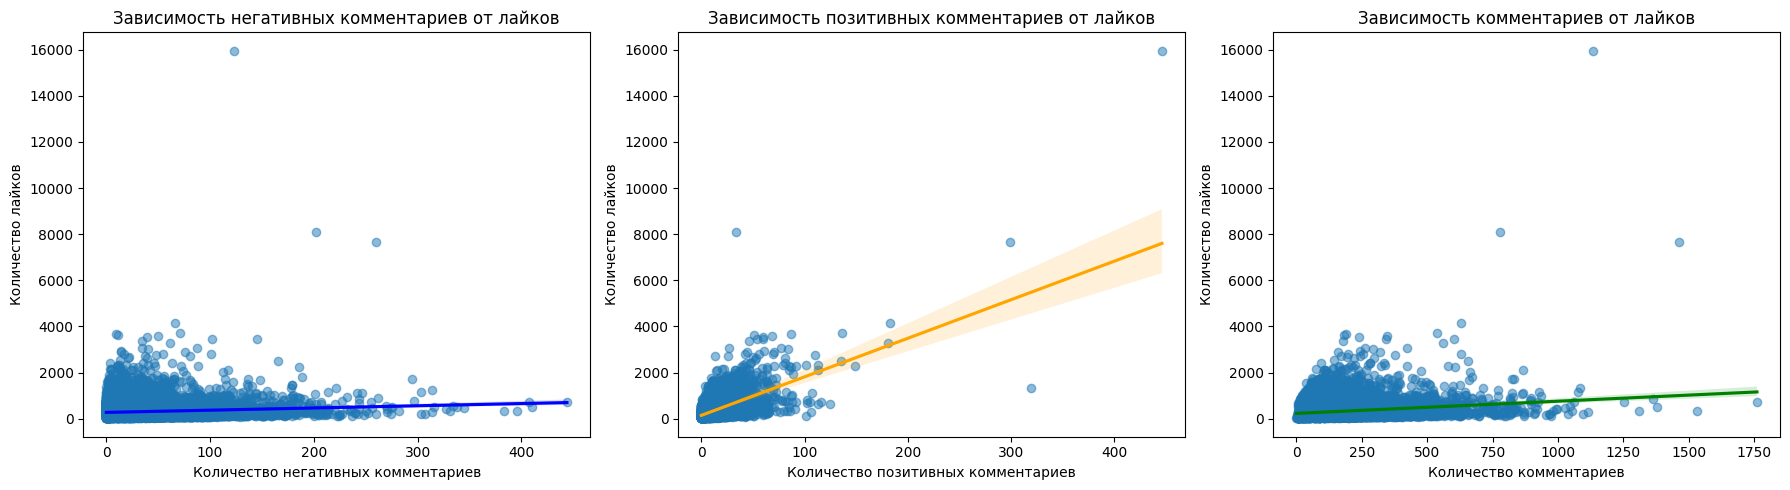

In [73]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(ax=axes[0], x='negatives', y='likes', data=df_vk, scatter_kws={'alpha':0.5}, line_kws={"color": "blue"})
axes[0].set_title('Зависимость негативных комментариев от лайков')
axes[0].set_xlabel('Количество негативных комментариев')
axes[0].set_ylabel('Количество лайков')

sns.regplot(ax=axes[1], x='positives', y='likes', data=df_vk, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
axes[1].set_title('Зависимость позитивных комментариев от лайков')
axes[1].set_xlabel('Количество позитивных комментариев')
axes[1].set_ylabel('Количество лайков')

sns.regplot(ax=axes[2], x='comments', y='likes', data=df_vk, scatter_kws={'alpha':0.5}, line_kws={"color": "green"})
axes[2].set_title('Зависимость комментариев от лайков')
axes[2].set_xlabel('Количество комментариев')
axes[2].set_ylabel('Количество лайков')

plt.tight_layout()
plt.show()

Можно отметить, что связь между количеством лайков и количеством негативных комментариев практически отсутствует, это свидетельствует о слабой или нулевой корреляции между этими переменными. Похожая ситуация наблюдается для зависимости между количеством лайков и общим числом комментариев, где также не выявляется заметной взаимосвязи. Однако при рассмотрении взаимосвязи между количеством лайков и числом позитивных комментариев обнаруживается сильная положительная корреляция, что указывает на явную тенденцию: публикации с большим числом лайков чаще сопровождаются значительным числом положительных откликов.

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [ ]:
top_10_positive = df_vk[df_vk['positive'] > threshold].nlargest(10)
print("Топ-10 позитивных комментариев:")
top_10_positive

In [45]:
from scipy.stats import norm

counts = np.array([len(df_vk['positives']), len(df_vk['negatives'])]) + 1
total = np.sum(counts)

fraction_positive = counts[0] / total
variance = np.prod(counts) / (np.square(total) * (np.sum(counts) + 1))
z_score = norm.ppf(0.95)

threshold = fraction_positive - z_score * np.sqrt(variance)

In [47]:
df_vk['positive_fraction'] = df_vk['positives'] / (df_vk['positives'] + df_vk['negatives'])

top_10_positive = df_vk[df_vk['positive_fraction'] > threshold].nlargest(10, 'positives')


print("Топ-10 постов с самой высокой долей позитивных комментариев:")
top_10_positive

Топ-10 постов с самой высокой долей позитивных комментариев:


id                                               href  \
14751  19755641  https://rsport.ria.ru/winter2018_hockey/201802...   
9552   21530735  https://rsport.ria.ru/russia2018_news/20180707...   
5582   22590171  https://rsport.ria.ru/fights/20181007/11434580...   
10267  21312534  https://rsport.ria.ru/russia2018_ourteam/20180...   
9809   21449629  https://rsport.ria.ru/russia2018_ourteam/20180...   
8739   21756625  https://realty.ria.ru/realtynews/20180726/1525...   
10438  21251930  https://rsport.ria.ru/russia2018_news/20180614...   
14752  19755204  https://rsport.ria.ru/winter2018_hockey/201802...   
9241   21632060  https://rsport.ria.ru/russia2018_news/20180715...   
14826  19730544  https://rsport.ria.ru/winter2018_figureskating...   

                  datetime                                              title  \
14751  2018-02-25 07:00:42  Российские хоккеисты победили немцев и завоева...   
9552   2018-07-07 20:54:15  Хорватия обыграла Россию по пенальти и вышла в...   
5582   2018-10-07 05:05:00  Хабиб Нурмагомедов победил Конора Макгрегора и...   
10267  2018-06-19 19:56:05          Сборная России обыграла Египет на ЧМ-2018   
9809   2018-07-01 16:51:11  Россия вышла в четвертьфинал ЧМ-2018, обыграв ...   
8739   2018-07-26 18:26:00  Московские власти собираются изъять участок, г...   
10438  2018-06-14 16:58:12        Сборная России разгромила Саудовскую Аравию   
14752  2018-02-25 06:36:46  Сборные России и Германии не выявили победител...   
9241   2018-07-15 16:56:49            Сборная Франции выиграла чемпионат мира   
14826  2018-02-23 05:01:13  Фигуристка Загитова принесла России первое зол...   

       likes  comments                                            snippet  \
14751  15959      1135                                                NaN   
9552    1326      1083                                            #ЧМ2018   
5582    7652      1462                                                NaN   
10267   4151       628  Урааа! Сборная России выиграла у Египта со сче...   
9809    3268       560                    Ураааааааааа!!!!! 🇷🇺🇷🇺🇷🇺#ЧМ2018   
8739    2295       580                                                NaN   
10438   3711       536  Ура! Счет 5:0! Дублем отметился Денис Черышев,...   
14752    642       356                                                NaN   
9241    2319       340                                            #ЧМ2018   
14826   2756       377                                                NaN   

                                             title_clean  \
14751  российские хоккеисты победили немцев и завоева...   
9552   хорватия обыграла россию по пенальти и вышла в...   
5582   хабиб нурмагомедов победил конора макгрегора и...   
10267           сборная россии обыграла египет на чм2018   
9809   россия вышла в четвертьфинал чм2018 обыграв ис...   
8739   московские власти собираются изъять участок гд...   
10438        сборная россии разгромила саудовскую аравию   
14752  сборные россии и германии не выявили победител...   
9241             сборная франции выиграла чемпионат мира   
14826  фигуристка загитова принесла россии первое зол...   

                                           snippet_clean  \
14751                                               unkn   
9552                                              чм2018   
5582                                                unkn   
10267  урааа сборная россии выиграла у египта со счет...   
9809                                 ураааааааааа чм2018   
8739                                                unkn   
10438  ура счет 50 дублем отметился денис черышев еще...   
14752                                               unkn   
9241                                              чм2018   
14826                                               unkn   

                                       sentiment_verdict  \
14751  [positive, neutral, positive, neutral, positiv...   
9552   [positive, positive, neutral, neutral, positiv...   


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__ гражданская война в россии

In [82]:
filtered = df_vk[df_vk['positive_fraction'] > threshold]
positive_news_count = filtered.groupby('category').size().reset_index(name='positive_news_count')
positive_news_count = positive_news_count.sort_values(by='positive_news_count', ascending=False)

In [83]:
positive_news_count

category  positive_news_count
18  гражданская война в россии (1917-1922),красная...                 1065
34                                     сумгаит,в мире                  616
9          антуан де сент-экзюпери,чебоксары,общество                  129
0                            blackberry ltd,экономика                   86
3                 robinson,момский район,происшествия                   64
25         москва,москва сегодня: мегаполис для жизни                   45
27             олесь бузина,украина,зиновьевский клуб                   27
23  интервью - чемпионат мира по футболу 2018,чемп...                   27
14    вопли видоплясова,олег скрипка,гаага,карикатуры                   20
20  душанбе,совет глав государств-участников снг,п...                   15
21            ильдар габдрахманов,новости подмосковья                   13
16                           галина польских,культура                   12
26                                 московская область                    9
10               ахмад бадреддин хассун,война в сирии                    9
33          спецпроекты - радио sputnik,радио sputnik                    8
24                                         милан,фото                    8
30                                    санкт-петербург                    7
28  российский еврейский конгресс,религия и мирово...                    7
1                             fivb,ари граса,волейбол                    6
38                       юрий зайцев,фвпр,водные виды                    6
22                  институт астрономии ран,риа наука                    5
12                                     виндзор,анонсы                    4
13   военная академия генерального штаба,безопасность                    3
31                            сергей климов,велоспорт                    3
19                    день интернета в россии,справки                    2
11                                        бали,туризм                    2
4                      savills,новости - недвижимость                    2
32                    сергей мяус,фхмр,хоккей с мячом                    1
37                            эмиль алиев,мини-футбол                    1
36                                    фифа,киберспорт                    1
35                       трэвис тайгарт,вокруг спорта                    1
2   opel astra,renault sandero,volkswagen polo,vol...                    1
17                            госжилинспекция,саратов                    1
5                         sony corporation,технологии                    1
15      восточный экономический форум-2018,видеостена                    1
6                               usada,легкая атлетика                    1
7        александр смышляев,художественная гимнастика                    1
8                    алексей немов,другие виды спорта                    1
29                         ршф,андрей филатов,шахматы                    1

__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ